## 0. 設定

In [1]:
# Do not show warnings
import warnings
warnings.filterwarnings('ignore')

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib for japanese support
import japanize_matplotlib

# functions for data frame display
from IPython.display import display

# Adjust display options
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.rcParams["font.size"]=14
random_seed = 123

## 1. 人工的にデータを作成

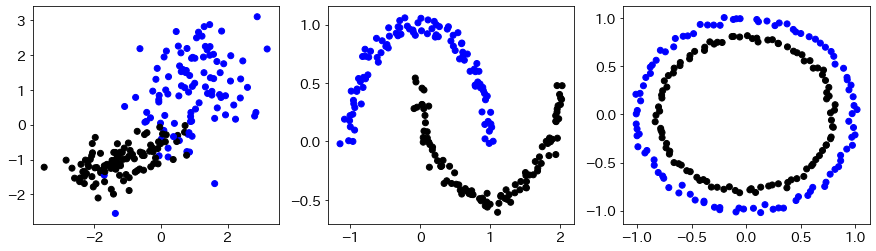

In [11]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=random_seed, n_clusters_per_class=1, n_samples=200, n_classes=2)
X2, y2 = make_moons(noise=0.05, random_state=random_seed, n_samples=200)
X3, y3 = make_circles(noise=0.02, random_state=random_seed, n_samples=200)

DataList = [(X1, y1), (X2, y2), (X3, y3)]
N = len(DataList)

plt.figure(figsize=(15,4))

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, i+1)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)

plt.show()

## 2. ロジスティック回帰

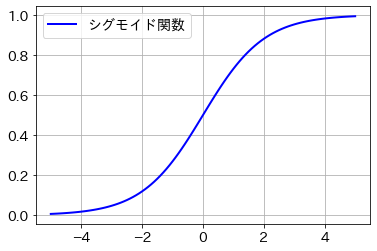

In [13]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-5, 5, 101)
y = sigmoid(x)
plt.plot(x, y, label='シグモイド関数', c='b', lw=2)
plt.legend()
plt.grid()
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


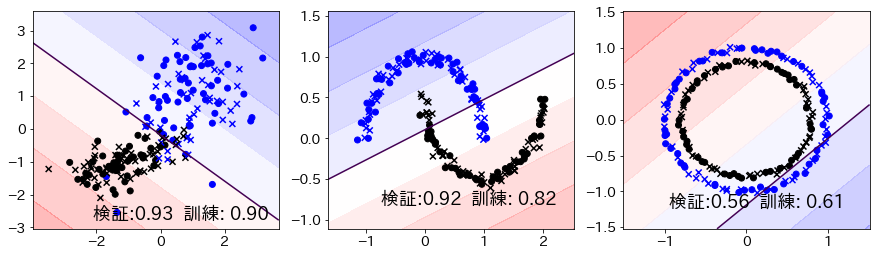

In [17]:
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

print(algorithm)

from sklearn.model_selection import train_test_split

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18)

def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

plot_boundaries(algorithm, DataList)

## 3. サポートマシン

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


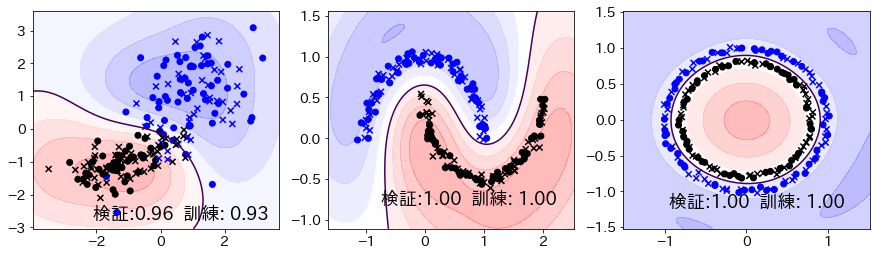

In [19]:
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf')

print(algorithm)

plot_boundaries(algorithm, DataList)

## 4. ニューラルネットワーク

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


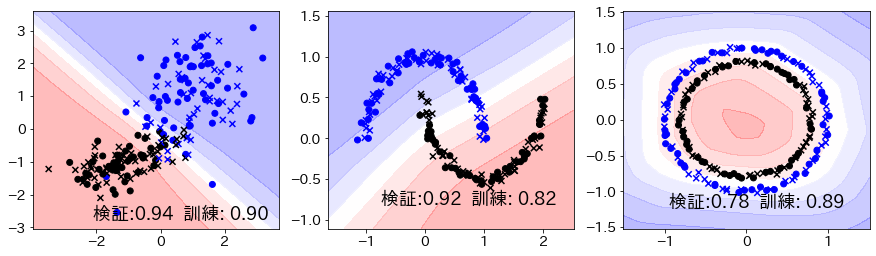

In [21]:
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(random_state=random_seed)

print(algorithm)

plot_boundaries(algorithm, DataList)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


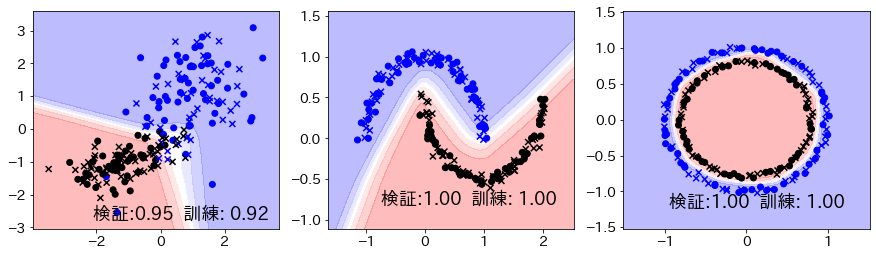

In [24]:
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=random_seed)

print(algorithm)

plot_boundaries(algorithm, DataList)

## 5. 決定木

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


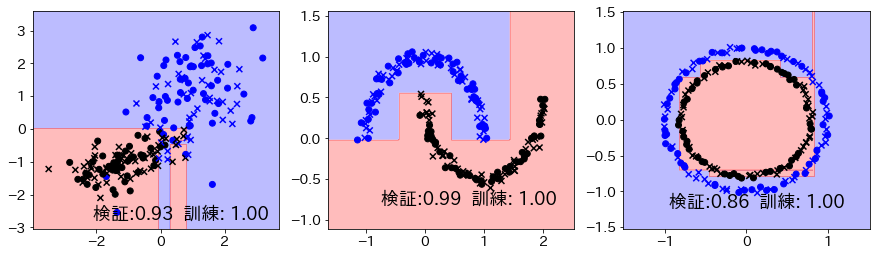

In [29]:
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)

print(algorithm)

plot_boundaries(algorithm, DataList)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


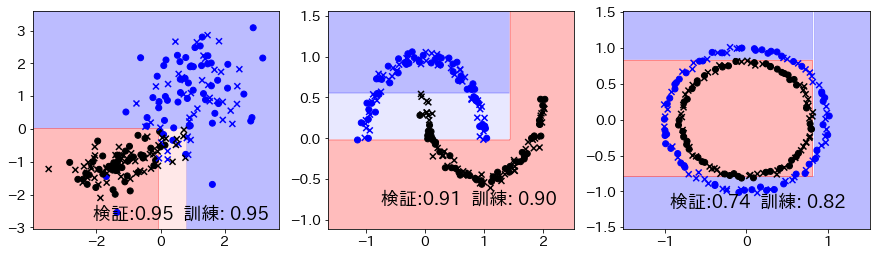

In [30]:
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(max_depth=3,
                                   random_state=random_seed)

print(algorithm)

plot_boundaries(algorithm, DataList)

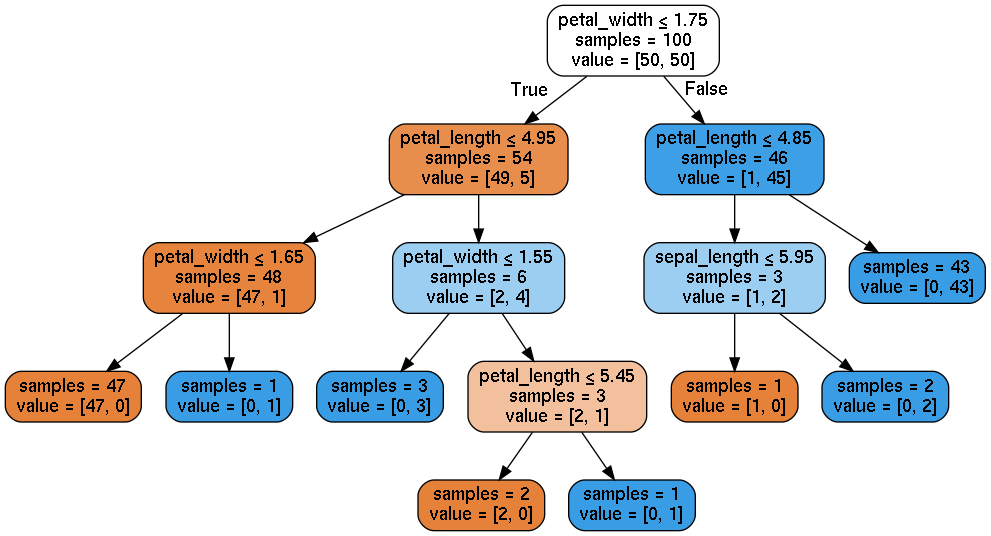

In [28]:
import seaborn as sns
df_iris = sns.load_dataset("iris")
df2 = df_iris[50:150]

X=df2.drop('species', axis=1)
y=df2['species']

from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(X, y)

from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz(algorithm, out_file=f, 
                         feature_names=X.columns, filled=True, rounded=True,
                         special_characters=True, impurity=False, proportion=False)
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png())

## 6. ランダムフォレスト
決定木はどのような性質のデータにも柔軟に対応できる点が特徴だが、過学習が起きやすいのが欠点である。この欠点を補うのは、ランダムフォレストである。基本的な考え方は、「弱分類器」と呼ばれる簡易的な分類器をたくさんつくり、それぞれの分類器の分類結果を集計して多数決で最終的な判断を行う。

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


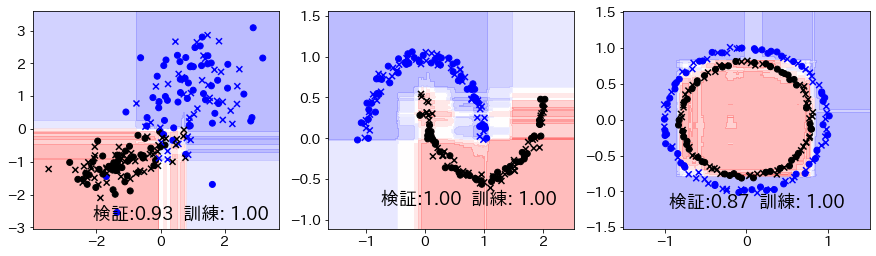

In [31]:
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)
print(algorithm)
plot_boundaries(algorithm, DataList)

## 7. XGBoost
eXtreme Gradient Boostingの略で、「アンサンブル」と呼ばれる複数の決定木を使って分類をするモデルの中で、「バギング」と呼ばれる手法と「ブースティング」と呼ばれる手法を組み合わせたものということになる。バギングはランダムフォレストのように、弱分類器を並列に作ってその結果を多数決で分類する方法である。一方のブースティングも、複数の分類器を使う点ではバギングと同じである。最大の違いは、バギングが複数の分類器が互いに無関係に学習するのに対して、ブースティングはひとつ前の分類器の結果を元にして次の分類器の学習をする点である。

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=123, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)
[00:47:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:47:51] WARNING: ../src/learner.cc:1061: Starti

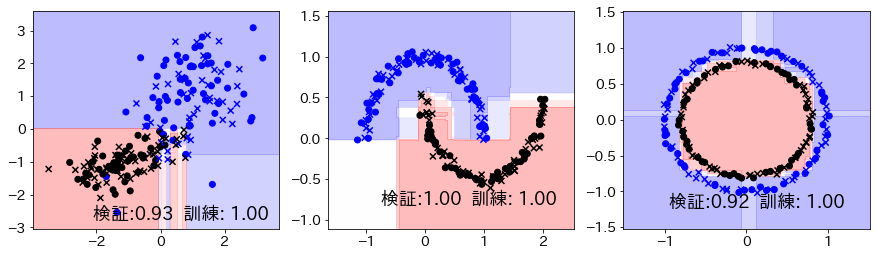

In [33]:
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)
print(algorithm)
plot_boundaries(algorithm, DataList)

## 8. アルゴリズムの選択方法
ロジスティック回帰と決定木は、構造が単純なため、人間が追いかけることが容易。「理由はわかららなくてよいからできるだけ正確に予測したい」場合は、サポートベクターマシンやニューラルネットワーク、ランダムフォレスト、XGBoostを選ぶことが多い。
複数のモデルを横並びに作って精度を比較し、一番よい結果のものを選ぶ方法が標準的である。具体的な方法としては、「交差検定法」と「グリッドサーチ」がある。